# Employee Turnover Prediction

## Table of contents
* 🔍 The problem 
* 📚 Importing libraries
* 📒 The dataset
* 🔬 Preprocessing
* 📈 Descriptive Statistics
* 📊 Exploratory data analysis (EDA)


### The problem 

Employees turnover costs are a significate concern for businesses worldwide. The average annual turnover rate in the U.S is 47% and replacing an employee costs up to 2 times of their annual salary. There are many factors that could lead to turnover like low pay or toxic work environment.However, 56% of job seekers value company culture over salary (https://builtin.com/recruiting/employee-turnover-statistics)

This is why it's important to predict employee turnover and know the factors that lead to it to prevent it.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import matplotlib.ticker as mtick


In [2]:
df = pd.read_csv("IBM-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### Preprocessing

In [3]:
#Identifying columns with only 1 unique value 
unique_counts = df.nunique()
single_value_columns = unique_counts[unique_counts==1]
print(single_value_columns)

EmployeeCount    1
Over18           1
StandardHours    1
dtype: int64


In [4]:
#dropping columns with only 1 unique value 
df.drop(columns=['EmployeeCount','Over18','StandardHours'],inplace=True)

In [5]:
#dropping unneccessary columns
df.drop(columns=['DailyRate','HourlyRate','MonthlyRate','EmployeeNumber'],inplace=True)



In [6]:
#Changing Yes and No from Attrition column to 1 and 0
df['Attrition'] = df['Attrition'].map({"Yes":1,"No":0})

### Descriptive Statistics

In [7]:
#Summary Statistics
df.describe()
# There doesn't seem to be any outliers

,Age,Attrition,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,9.192517,2.912925,2.721769,2.729932,2.063946,2.728571,6502.931293,2.693197,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,8.106864,1.024165,1.093082,0.711561,1.106940,1.102846,4707.956783,2.498009,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2911.000000,1.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,7.000000,3.000000,3.000000,3.000000,2.000000,3.000000,4919.000000,2.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,14.000000,4.000000,4.000000,3.000000,3.000000,4.000000,8379.000000,4.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,29.000000,5.000000,4.000000,4.000000,5.000000,4.000000,19999.000000,9.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [8]:
# No null values
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

### Explarotary Data Analysis(EDA)

#### Lets first set the questions that we want to answer
- Is there a difference between females and males turnover rate?
- Which variables have the highest impact on the turnover?
- 


Text(0, 0.5, 'Count')

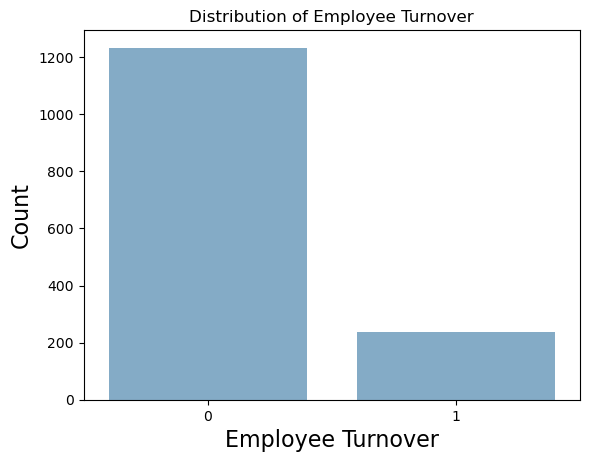

In [9]:
#Distribution of Employees Turnover in the dataset

turnover = df['Attrition'].value_counts()
sns.barplot(y=turnover.values, x=turnover.index, alpha=0.6)
plt.title('Distribution of Employee Turnover')
plt.xlabel('Employee Turnover', fontsize=16)
plt.ylabel('Count', fontsize=16)

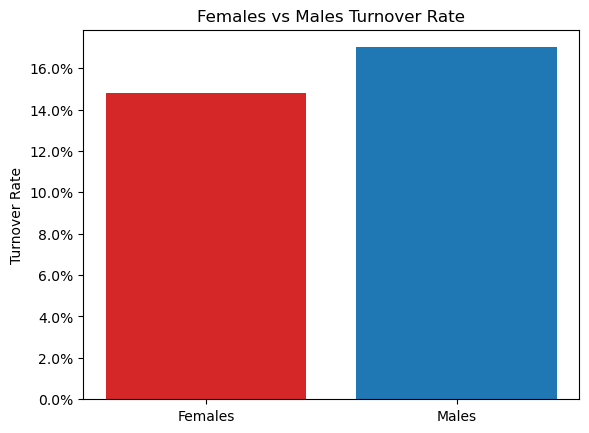

In [10]:
male_turnover_rate = df[df['Gender'] == 'Male']['Attrition'].value_counts()[1]/df[df['Gender'] == 'Male'].shape[0] *100
female_turnover_rate = df[df['Gender'] == 'Female']['Attrition'].value_counts()[1]/df[df['Gender'] == 'Female'].shape[0]*100
fig, axes = plt.subplots()
bar_labels = ['red', 'blue']
bar_colors = ['tab:red', 'tab:blue']

axes.bar(['Females','Males'], [female_turnover_rate,male_turnover_rate], label=bar_labels, color=bar_colors)

axes.set_ylabel('Turnover Rate')
axes.set_title('Females vs Males Turnover Rate')
axes.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.show()

<Axes: xlabel='Age', ylabel='Count'>

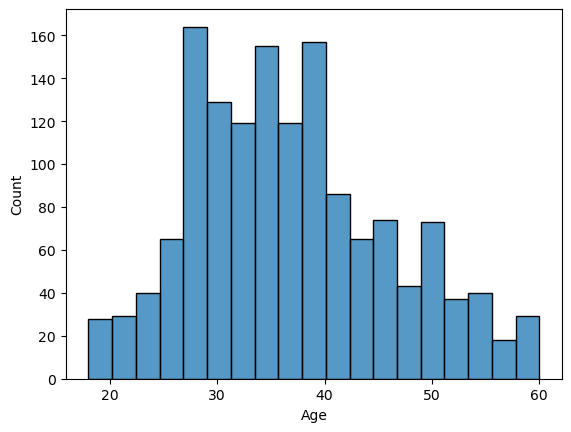

In [11]:

#Age Distribution
sns.histplot(data=df['Age'])

In [12]:
corr = df.corr(numeric_only=True)

Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

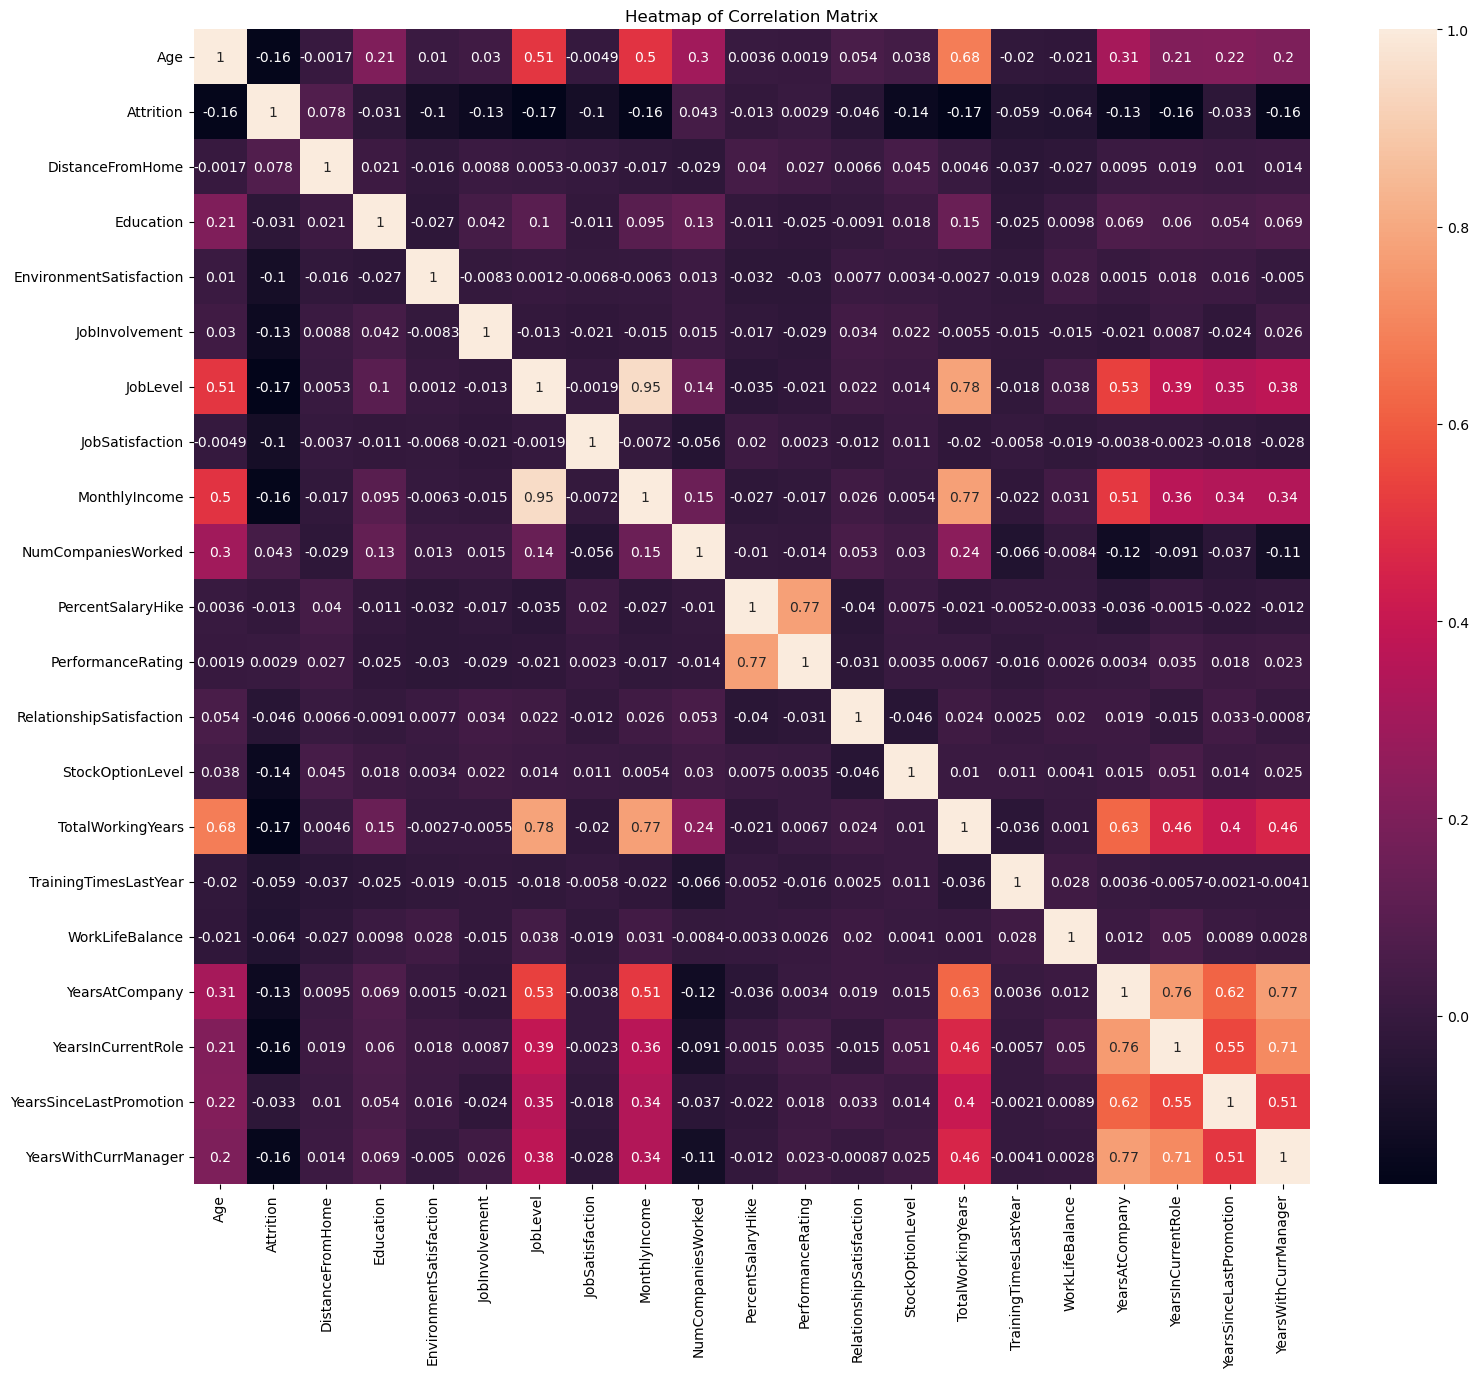

In [14]:
# correlation matrix - DistanceFromHome have the highest impact followed by Number fo companies worked on 
plt.figure(figsize=(18,15))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True)
plt.title('Heatmap of Correlation Matrix')

Text(0, 0.5, 'Employee Count')

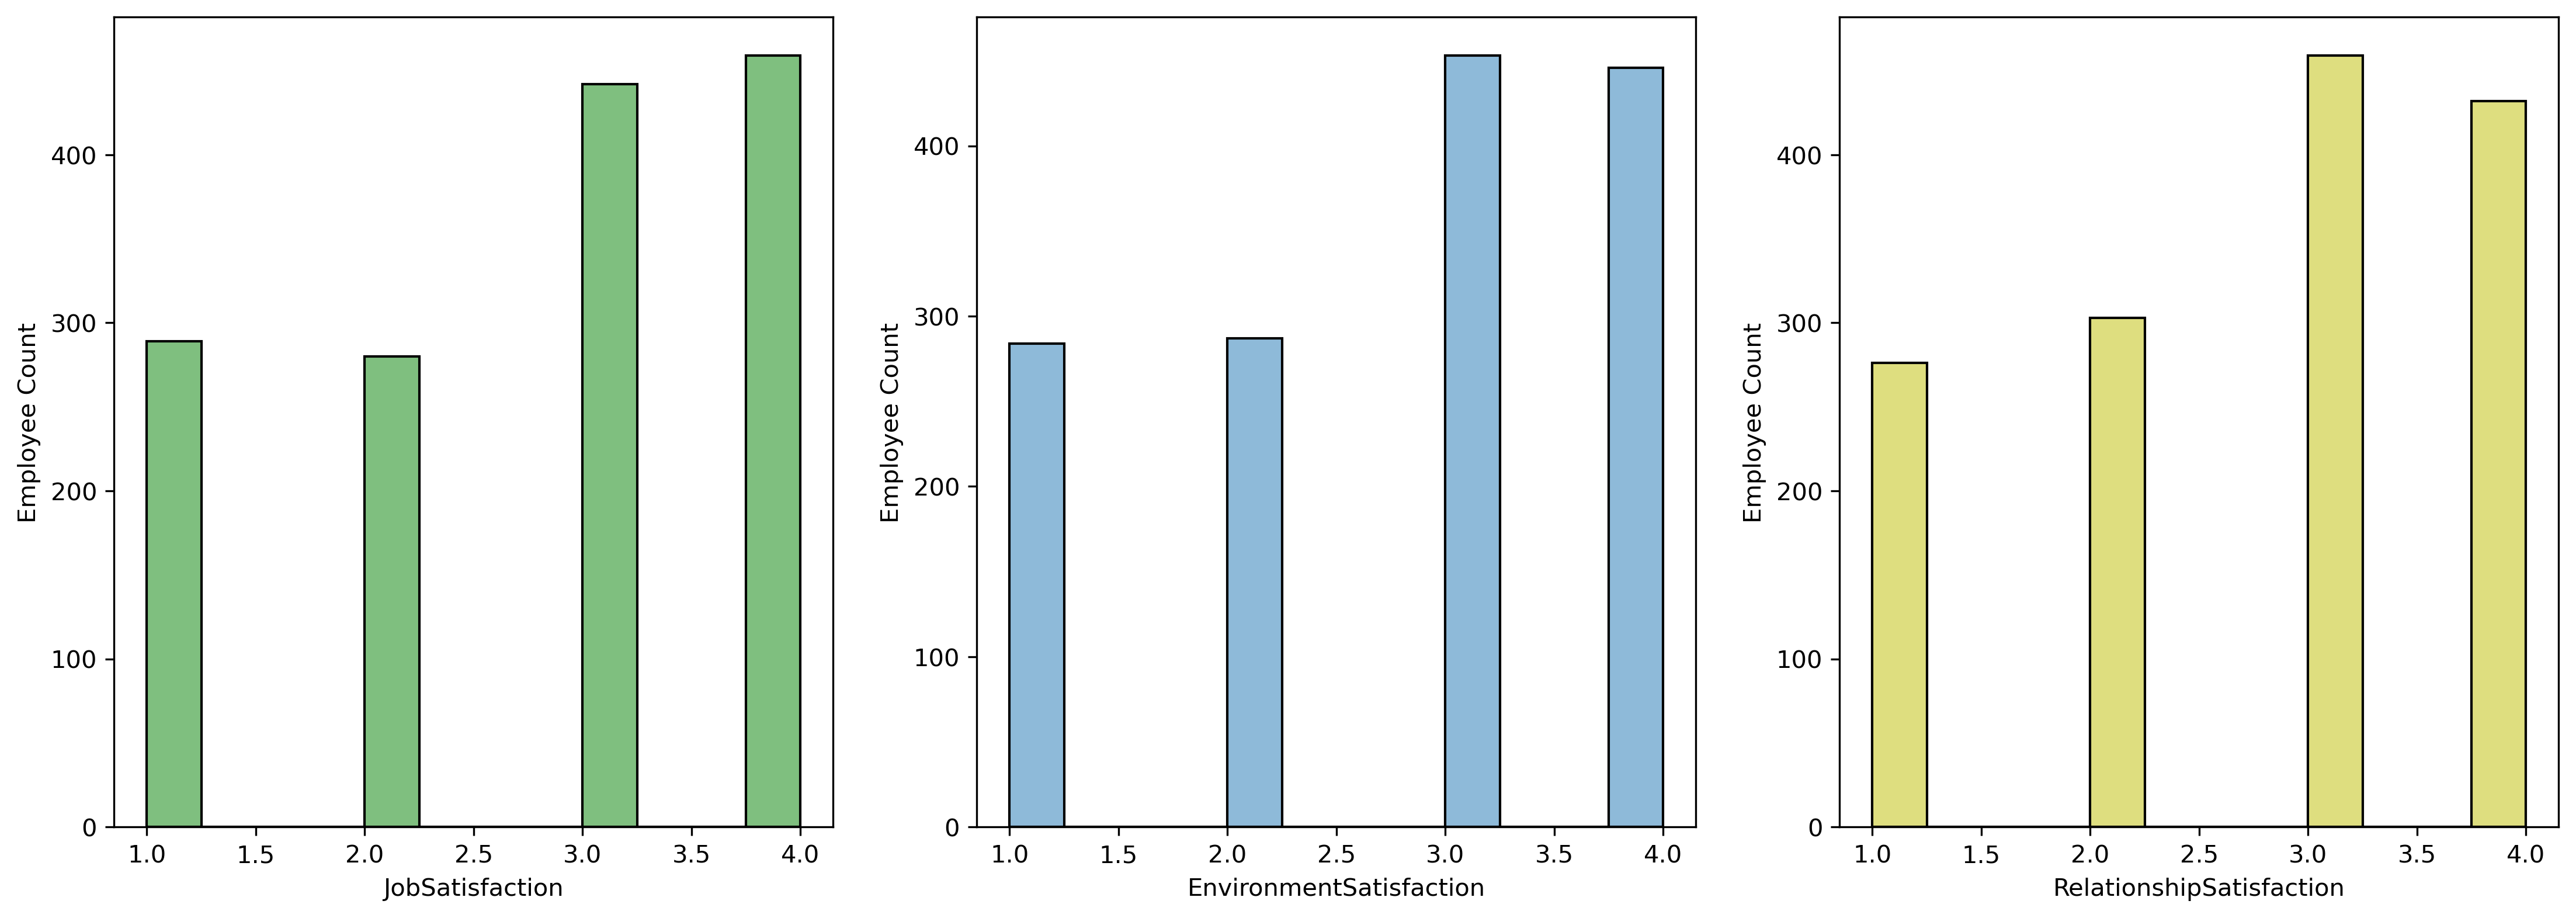

In [45]:
#Satisfaction Distribution
fig, axes = plt.subplots(ncols=3,figsize=(18, 6), dpi=300)
js = sns.histplot(data=df['JobSatisfaction'],ax=axes[0],color='g',alpha =0.5)
js.set_ylabel("Employee Count")
es = sns.histplot(data=df['EnvironmentSatisfaction'],ax=axes[1],alpha =0.5)
es.set_ylabel("Employee Count")
rs = sns.histplot(data=df['RelationshipSatisfaction'],ax=axes[2],color='y',alpha =0.5)
rs.set_ylabel("Employee Count")
